In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chain_rg_ree=pd.read_csv('checking_different_seed_master_out.csv')
chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5


In [3]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [4]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [ ]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

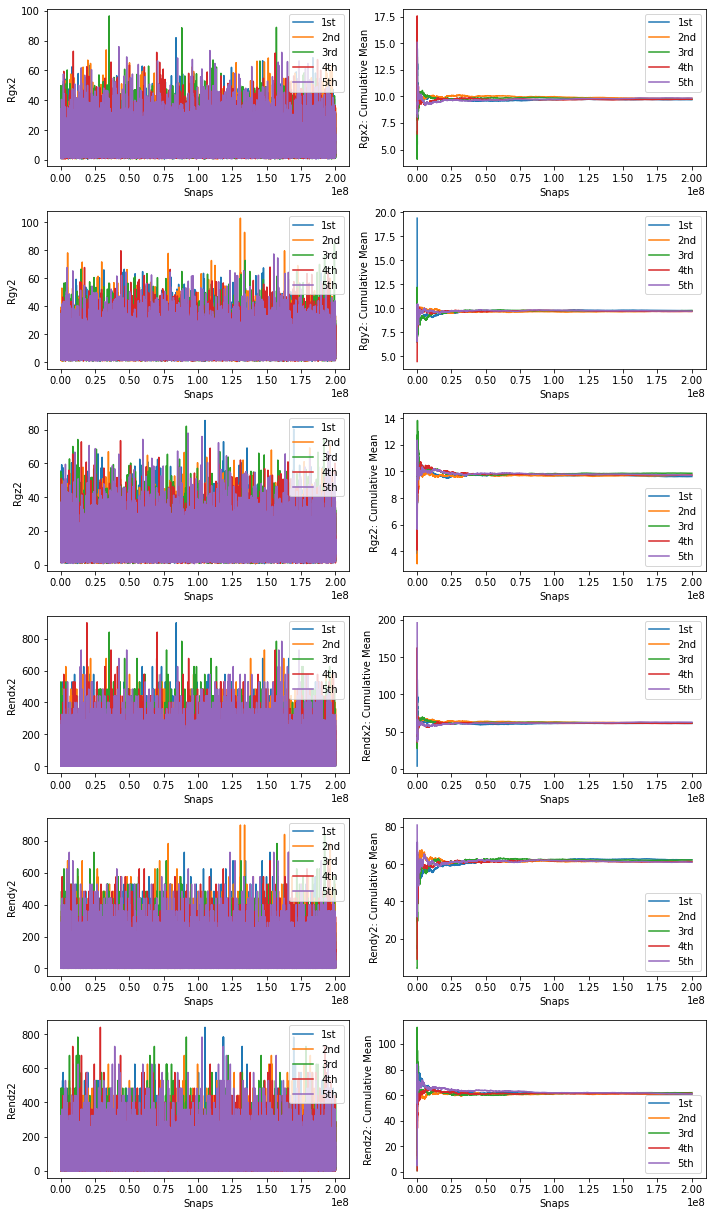

In [4]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))
chain_length = chain_rg_ree.chain_length.unique()
for chain_length in chain_length:
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,
                label=str(chain_length))
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),
                label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')
    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,
                label=str(chain_length))
    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),
                label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()
    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,
                label=str(chain_length))
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),
                label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,
                label=str(chain_length))
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),
                label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
    ax[3,1].legend()
    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,
                label=str(chain_length))
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),
                label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
    ax[4,1].legend()
    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,
                label=str(chain_length))
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),
                label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')
    ax[5,1].legend()
plt.tight_layout()

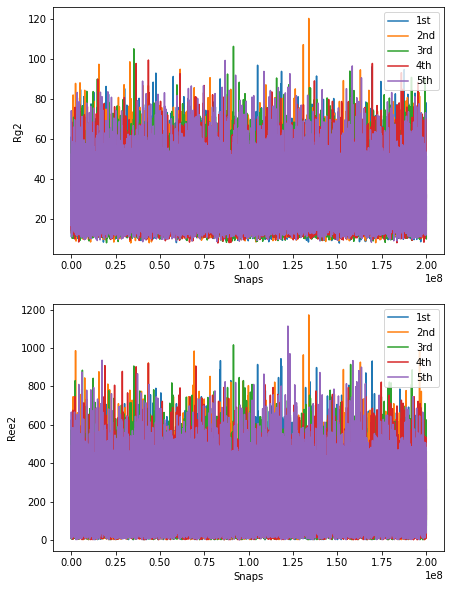

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,10))
chain_length = chain_rg_ree.chain_length.unique()
for chain_length in chain_length:
    ax[0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
                label=str(chain_length))
    ax[0].set_ylabel('Rg2')
    ax[0].set_xlabel('Snaps')
    ax[0].legend()
    ax[1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rend2.values,
                label=str(chain_length))
    ax[1].set_ylabel('Ree2')
    ax[1].set_xlabel('Snaps')
    ax[1].legend()    


In [7]:
cum_mean(chain_rg_ree[chain_rg_ree.chain_length=='1st'].Rgx)

0        4.062400
1        4.356200
2        5.490800
3        5.323700
4        4.981840
           ...   
20005    6.000745
20006    6.000888
20007    6.000814
20008    6.000709
20009    6.000784
Name: Rgx, Length: 20010, dtype: float64

In [11]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = ['1st','2nd','3rd','4th','5th']
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.75*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree_75=blank_df.copy()
del blank_df, temp_df

mean=  5.981024924943319 for run =  1st std=  2.7617591307387426 error =  0.02254440912737716
mean=  5.951767969217612 for run =  2nd std=  2.7385635662907224 error =  0.022355062312502418
mean=  5.976667516260485 for run =  3rd std=  2.7005709352333693 error =  0.022044926135581965
mean=  5.962384489221866 for run =  4th std=  2.727024349894839 error =  0.022260866981511133
mean=  5.919711239323871 for run =  5th std=  2.705192250091529 error =  0.02208265021213491


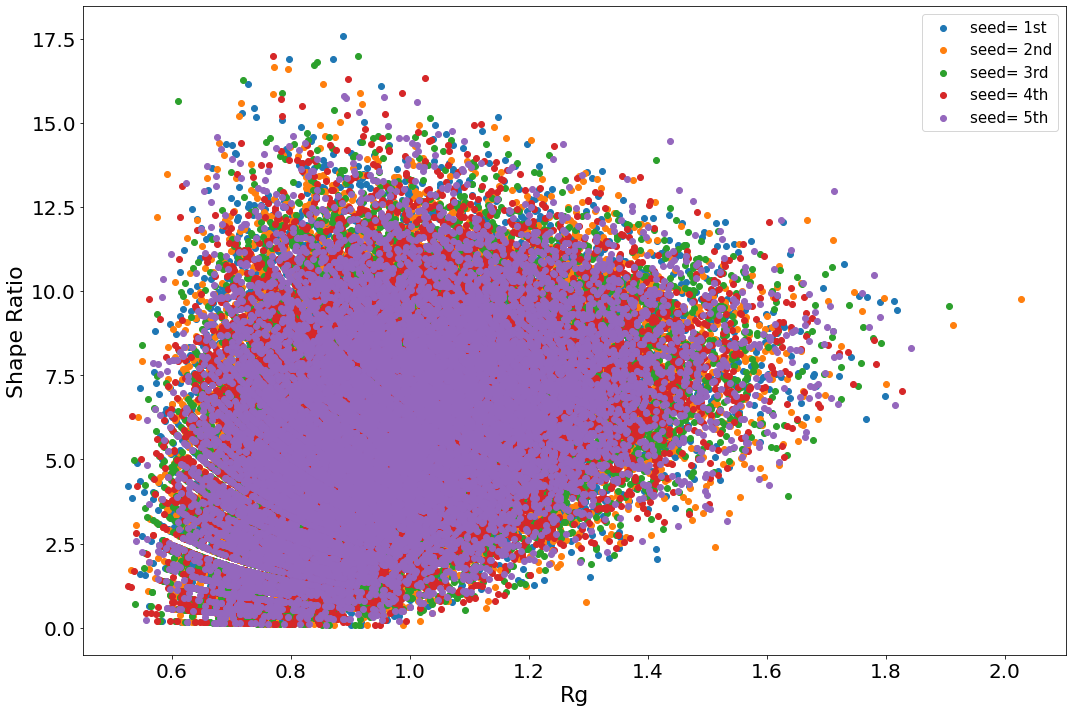

In [25]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
equil_chain_rg_ree_mean_rg=equil_chain_rg_ree.iloc[::every_ith_frame,:].Rg2.values.mean()**0.5
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values**0.5/equil_chain_rg_ree_mean_rg,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='seed= '+str(i))
    #print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

mean=  5.94961748704661 for run =  1st std=  2.8553428133158745 error =  0.09024875480476616
mean=  5.97760986443338 for run =  2nd std=  2.7679498146239943 error =  0.08748652629972807
mean=  5.9912709532896296 for run =  3rd std=  2.677794039918167 error =  0.08463697479658958
mean=  5.960441166839915 for run =  4th std=  2.829041527128898 error =  0.08941745065555196
mean=  5.9653238193367795 for run =  5th std=  2.6908760296288747 error =  0.0850504569453019


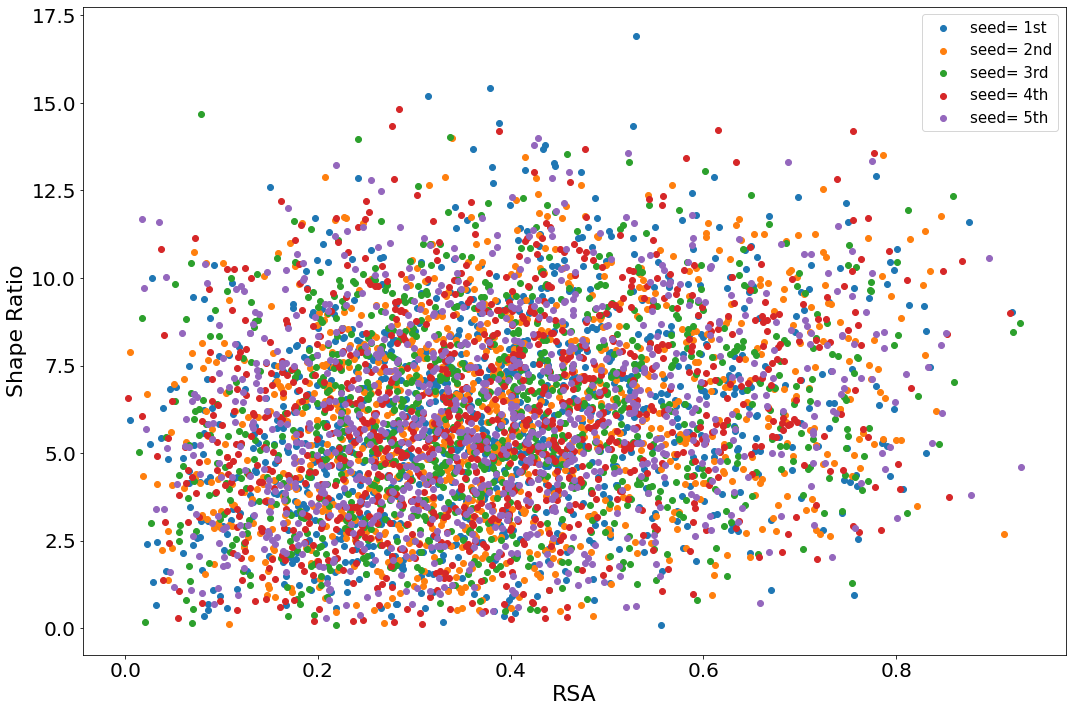

In [9]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=5
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='seed= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=15)
ax.set_xlabel('RSA',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

In [42]:
equil_chain_rg_ree[equil_chain_rg_ree.ratio==equil_chain_rg_ree.ratio.min()]

,frames,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio
97826,177870000,5th,0.0,7.3024,4.3076,3.4,0.0,1.0,0.0,1.0,15.01,0.066622


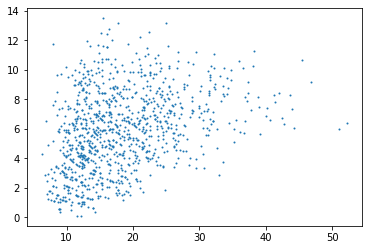

In [34]:
i='2nd'
every_ith_frame=5
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='seed= '+str(i),s=1)


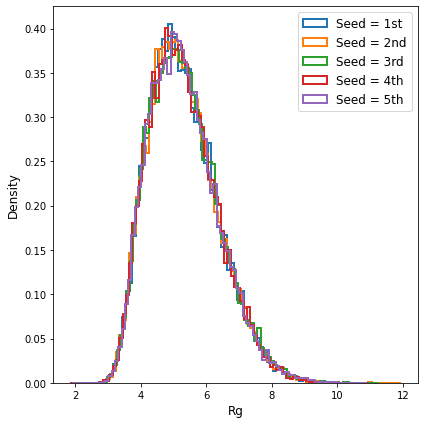

In [20]:
fig = plt.subplots(figsize=(6,6))
for chain_length in chain_rg_ree.chain_length.unique():
    plt.hist(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values.min()**0.5-1,
                                        chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values.max()**0.5+1,0.1),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


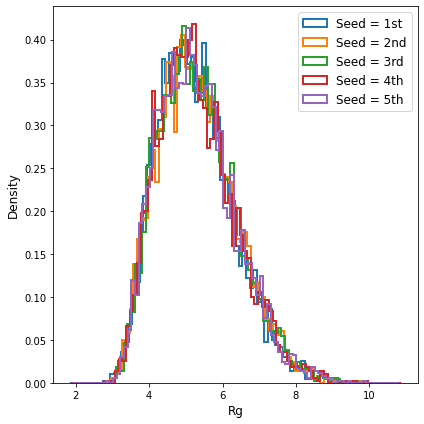

In [15]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree_25.chain_length.unique():
    plt.hist(equil_chain_rg_ree_25[equil_chain_rg_ree_25.chain_length==chain_length].Rg2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree_25[equil_chain_rg_ree_25.chain_length==chain_length].Rg2.values**0.5).min()-1,
                                        (equil_chain_rg_ree_25[equil_chain_rg_ree_25.chain_length==chain_length].Rg2.values**0.5).max()+1,0.1),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


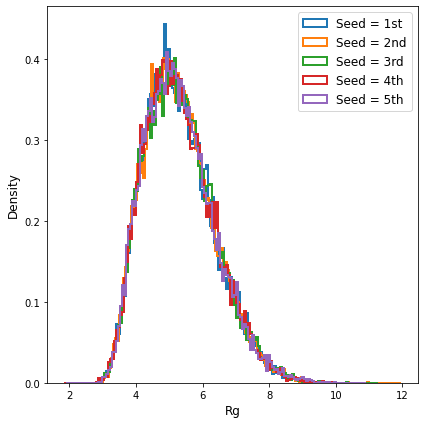

In [16]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree_75.chain_length.unique():
    plt.hist(equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].Rg2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].Rg2.values**0.5).min()-1,
                                        (equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].Rg2.values**0.5).max()+1,0.06),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


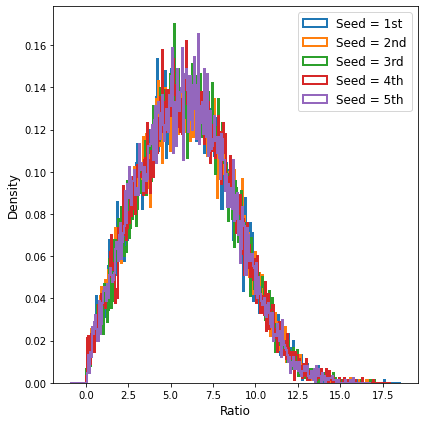

In [22]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree_75.chain_length.unique():
    plt.hist(equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].ratio.values,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].ratio.values).min()-1,
                                        (equil_chain_rg_ree_75[equil_chain_rg_ree_75.chain_length==chain_length].ratio.values).max()+1,0.06),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [ ]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5).max()+1,0.06),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rgx2",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


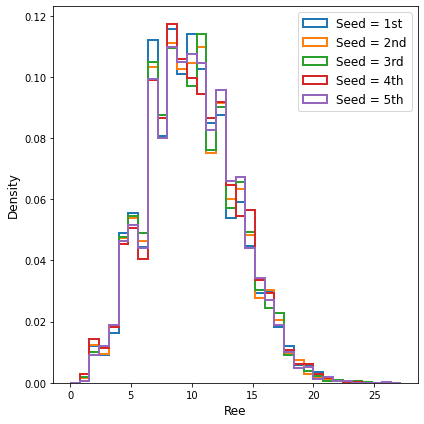

In [27]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


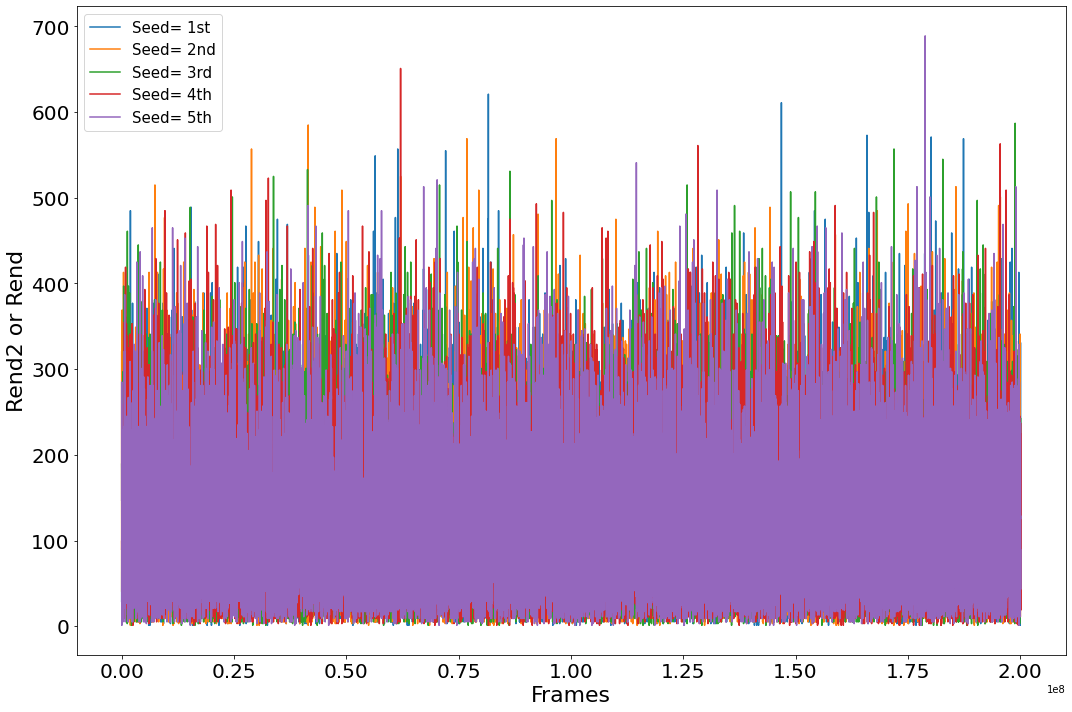

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Seed= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

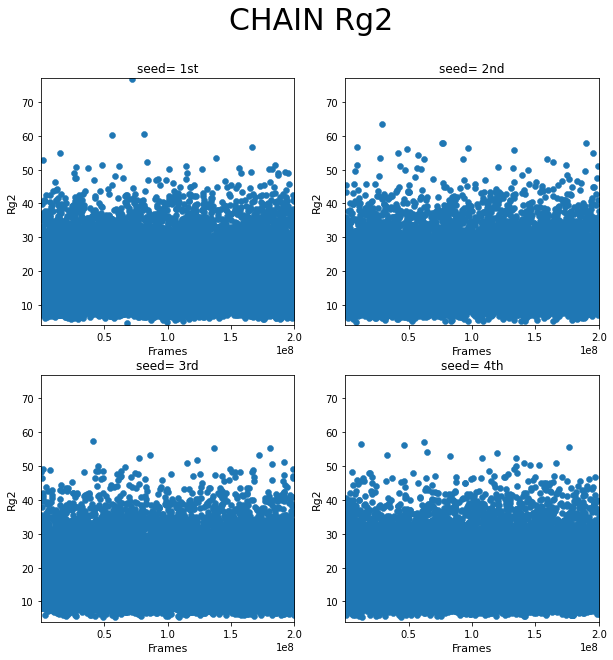

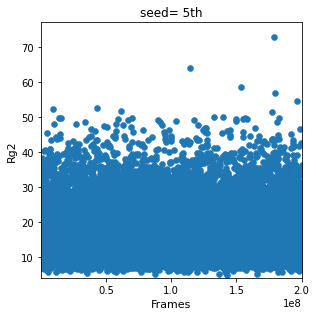

In [35]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('seed= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg2',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()-2),int(chain_rg_ree.frames.values.max())+1)
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()),int(chain_rg_ree.Rg2.values.max())+1)
        counter+=1
fig.suptitle('CHAIN Rg2',fontsize=30)
fig, axs = plt.subplots(figsize=(4.5,4.5))
axs.scatter(chain_rg_ree[chain_rg_ree.chain_length=='5th'].frames.values,
                                         chain_rg_ree[chain_rg_ree.chain_length=='5th'].Rg2.values,
                                      linewidth=0.5)
axs.set_title('seed= 5th',fontsize=12)
axs.set_ylabel('Rg2',fontsize=11)
axs.set_xlabel('Frames',fontsize=11)
axs.set_xlim(int(chain_rg_ree.frames.values.min()-2),int(chain_rg_ree.frames.values.max())+1)
axs.set_ylim(int(chain_rg_ree.Rg2.values.min()),int(chain_rg_ree.Rg2.values.max())+1)
plt.tight_layout()
